In [ ]:
import pandas as pd
df = pd.read_csv('./heart_failure_clinical_records_dataset.csv')
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
dft = df.values #showing values as numbers in a matrix - matrix (sets of numbers of rows and columns)

In [ ]:
dft

array([[7.500e+01, 0.000e+00, 5.820e+02, ..., 0.000e+00, 4.000e+00,
        1.000e+00],
       [5.500e+01, 0.000e+00, 7.861e+03, ..., 0.000e+00, 6.000e+00,
        1.000e+00],
       [6.500e+01, 0.000e+00, 1.460e+02, ..., 1.000e+00, 7.000e+00,
        1.000e+00],
       ...,
       [4.500e+01, 0.000e+00, 2.060e+03, ..., 0.000e+00, 2.780e+02,
        0.000e+00],
       [4.500e+01, 0.000e+00, 2.413e+03, ..., 1.000e+00, 2.800e+02,
        0.000e+00],
       [5.000e+01, 0.000e+00, 1.960e+02, ..., 1.000e+00, 2.850e+02,
        0.000e+00]])

In [ ]:
import numpy

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [ ]:
X = df.iloc[:,0:12].values #splitting values - x is the variables - independent variables 

In [ ]:
Y = df.iloc[:,12].values #y is the dependent variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() #it changes the values to fit in a specific range - range needed because it would be difficult to do model evaluation - easier to plot
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [ ]:
print(X)

[[7.500e+01 0.000e+00 5.820e+02 ... 1.000e+00 0.000e+00 4.000e+00]
 [5.500e+01 0.000e+00 7.861e+03 ... 1.000e+00 0.000e+00 6.000e+00]
 [6.500e+01 0.000e+00 1.460e+02 ... 1.000e+00 1.000e+00 7.000e+00]
 ...
 [4.500e+01 0.000e+00 2.060e+03 ... 0.000e+00 0.000e+00 2.780e+02]
 [4.500e+01 0.000e+00 2.413e+03 ... 1.000e+00 1.000e+00 2.800e+02]
 [5.000e+01 0.000e+00 1.960e+02 ... 1.000e+00 1.000e+00 2.850e+02]]


In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler() #transform values into a range - smaller range - to easier to analyse - to reduce deviation - to not affect the output
X_scale = min_max_scaler.fit_transform(X) #

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape) #training, testing and validating - we are testing and validating on the same number



(209, 12) (45, 12) (45, 12) (209,) (45,) (45,)


In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)

In [ ]:
from keras.models import Sequential #keras used to build neural networks on python
from keras.layers import Dense

In [ ]:
model = Sequential([ #layers - layers of neural networks - has three layers the hidden layers perform the regression by looking at the input features and extracting features of importance
    Dense(32, activation='relu', input_shape=(12,)), #dense - takes in an input and returns an output - input_shape - number of records being considered
    Dense(32, activation='relu'), 
    Dense(1, activation='sigmoid'),
])


In [ ]:
model.compile(optimizer='sgd', #optimiser - process of bringing your predicted value and actual value closer - whatever the actual y value is in the dataset and the predicted value - reduces the difference - takes in batches - small parts - on each batch it calculates the derivative of loss - how much it has changed by (the actual value and the predicted value)
              loss = 'binary_crossentropy', #how you calculate the difference between the actual value and the predicted value - model for reducing the loss
              metrics = ['accuracy']) #accuracy 

In [ ]:
hist = model.fit(X_train, Y_train, #changing batch size - set my batch size - epoch how many times it runs, after it runs after a certain amount, it plateaus.
          batch_size=10, epochs=100, #splitting model - giving it training data and the batch size specifies you need to fit the at most 10 records in the model and epoch is the number of times you are going to run the model - initially it was 25 the batch size and when you run it the accuracy was realy low - calculating loss - change in predicted value and actual value - if you have a large batch size there will be huge differences in the model 
          validation_data=(X_val, Y_val)) #overfitting - model performs on seen data and not on unseen data - making the model too familiar with the data - the data performs better on seen data than unseen dat - bad job of making predictions on unseen data - if we don't have a lot of testing data - tradeoff between accuarcy and precision

Epoch 1/100
21/21 [==============================] - 1s 26ms/step - loss: 0.6422 - accuracy: 0.7106 - val_loss: 0.6751 - val_accuracy: 0.6222
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6426 - accuracy: 0.6715 - val_loss: 0.6737 - val_accuracy: 0.6222
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6232 - accuracy: 0.7008 - val_loss: 0.6733 - val_accuracy: 0.6222
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6340 - accuracy: 0.6485 - val_loss: 0.6736 - val_accuracy: 0.6222
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6225 - accuracy: 0.6610 - val_loss: 0.6741 - val_accuracy: 0.6222
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6063 - accuracy: 0.6914 - val_loss: 0.6749 - val_accuracy: 0.6222
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6121 - accuracy: 0.6973 - val_loss: 0.6754 - val_accuracy: 0.6222
Epoch 8/100


In [ ]:
model.evaluate(X_test, Y_test)[1]

2/2 [==============================] - 0s 5ms/step - loss: 0.4888 - accuracy: 0.8000


0.800000011920929

In [ ]:
y_pred = model.predict_proba(X_test)
print(y_pred)

[[0.28524205]
 [0.6117098 ]
 [0.14311543]
 [0.5960081 ]
 [0.84157264]
 [0.02804932]
 [0.03353941]
 [0.23839113]
 [0.5302278 ]
 [0.06344634]
 [0.7617774 ]
 [0.88601106]
 [0.05303079]
 [0.18726233]
 [0.8138211 ]
 [0.0192073 ]
 [0.5265034 ]
 [0.7967671 ]
 [0.3945309 ]
 [0.22081971]
 [0.8883985 ]
 [0.03960919]
 [0.08421835]
 [0.13631642]
 [0.8191916 ]
 [0.0932554 ]
 [0.0617575 ]
 [0.1666407 ]
 [0.4710663 ]
 [0.18154863]
 [0.27657613]
 [0.06446698]
 [0.72135353]
 [0.03981096]
 [0.01069182]
 [0.04663271]
 [0.1363737 ]
 [0.34434444]
 [0.16431668]
 [0.11544266]
 [0.24734858]
 [0.36551797]
 [0.11837   ]
 [0.3846893 ]
 [0.37577274]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


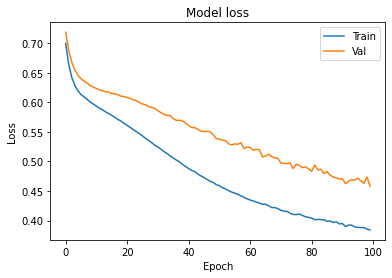

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Goal to have them as close as possible 

In [ ]:
#from sklearn.metrics import classification_report
#classification_report(Y_test,y_pred)

In [ ]:
import time

In [ ]:
%timeit encoder.fit(Y)

The slowest run took 12.02 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 13.4 µs per loop


In [ ]:
%timeit model 

The slowest run took 37.86 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 5: 32.8 ns per loop


In [ ]:
%timeit model.compile

The slowest run took 55.49 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 5: 75.2 ns per loop


In [ ]:
%timeit hist

The slowest run took 32.52 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 5: 39.4 ns per loop


In [ ]:
%timeit model.evaluate

The slowest run took 69.15 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 5: 75.5 ns per loop


In [ ]:
%timeit y_pred

The slowest run took 51.03 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 5: 33 ns per loop


In [ ]:
pip install memory_profiler

  Created wheel for memory-profiler: filename=memory_profiler-0.58.0-cp37-none-any.whl size=30180 sha256=31428f416d17afd16659086e3ed9094de5a424428b5534af07131d7408bb6ea2
  Stored in directory: /root/.cache/pip/wheels/02/e4/0b/aaab481fc5dd2a4ea59e78bc7231bb6aae7635ca7ee79f8ae5
Successfully built memory-profiler


In [ ]:
%load_ext memory_profiler

In [ ]:
%memit encoder.fit(Y)

peak memory: 404.59 MiB, increment: 0.00 MiB


In [ ]:
%memit model

peak memory: 426.09 MiB, increment: 0.03 MiB


In [ ]:
%memit model.compile

peak memory: 426.28 MiB, increment: 0.00 MiB


In [ ]:
%memit hist

peak memory: 426.63 MiB, increment: 0.00 MiB


In [ ]:
%memit model.evaluate

peak memory: 426.80 MiB, increment: 0.00 MiB


In [ ]:
%memit y_pred

peak memory: 426.88 MiB, increment: 0.00 MiB


In [ ]:
import numpy as np

In [ ]:
#Cost assumptions
'''Cost of FP: 1, cost of FN: 2, cost of TN: 0, cost of TP: -1'''
cost_TP = -1; cost_FP = 1; cost_FN = 2; cost_TN = 0;
cb_matrix = -1*np.array([[cost_TP, cost_FP],[cost_FN, cost_TN]])

In [ ]:
def standard_confusion_matrix(y_true, y_predict):
    TP = sum((y_true == 1) & (y_predict == 1))
    TN = sum((y_true == 0) & (y_predict == 0))
    FP = sum((y_true == 0) & (y_predict == 1))
    FN = sum((y_true == 1) & (y_predict == 0))
    
    return np.array([[TP,FP],[FN,TN]])

In [ ]:
def profit_curve(cb, predict_probas, labels):
    indices = np.argsort(predict_probas)
    sorted_probs = predict_probas[indices]
    sorted_labels = labels[indices]
    
    profit_list = []
    
    for sp, sl in zip(sorted_probs, sorted_labels):
        predict_labels = sorted_probs > sp + .0001
        conf_mat = standard_confusion_matrix(sorted_labels, predict_labels)
        profit_list.append((cb * conf_mat).sum() / float(len(labels)))
    return profit_list, sorted_probs

In [ ]:
def plot_profit_curve(model, label, costbenefit, X_train, X_test, y_train, y_test, col):
    model.fit(X_train, y_train)
    predict_probas = model.predict_proba(X_test)[:,0]
    profit_list, sorted_probs = profit_curve(costbenefit, predict_probas, y_test)
    max_index = np.argmax(profit_list)
    max_threshold = sorted_probs[max_index]
    max_profit = profit_list[max_index]
    
    plt.plot(sorted_probs, profit_list, label=label, color=col, linewidth=3)
    plt.plot(max_threshold, max_profit, '.', color=col, markersize=18)

In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

7/7 [==============================] - 0s 2ms/step - loss: 0.3445 - accuracy: 0.8565


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


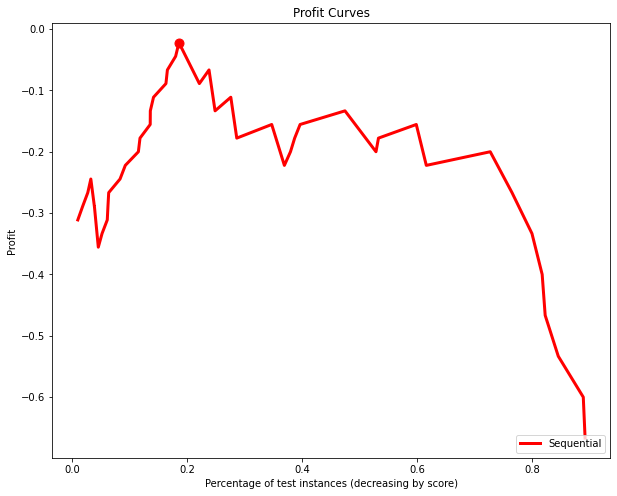

In [ ]:
models = [model]
fig = plt.figure(figsize=(10,8))
# fig.set_facecolor('#F2F2F2')
colors = ['r', 'g', 'b', 'm']
for i, model in enumerate(models):
    plot_profit_curve(model, model.__class__.__name__, cb_matrix,
                      X_train, X_test, Y_train, Y_test, colors[i])
plt.title("Profit Curves")
plt.xlabel("Percentage of test instances (decreasing by score)")
plt.ylabel("Profit")
plt.legend(loc='lower right')
plt.savefig('Profit_curve.png', facecolor=fig.get_facecolor())
plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report = classification_report(Y_test,y_pred.round(),output_dict = True)
import seaborn as sns
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(Y_test,y_pred.round(),normalize=None)
print(cf_matrix)

In [ ]:
import seaborn as sns
import numpy as np

In [ ]:
group_names = ['True Neg','false Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(Y_test, y_pred)
print(auc_score1)

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.plot_roc_curve(hist, X_test, Y_test)
plt.show()


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
roc_curve = round(auc(fpr,tpr),2)
pyplot.title(label='ROC curve')
pyplot.plot(fpr, tpr, label='NeuralNetworks (AUC = ' + str(roc_curve) + ')')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

https://stackoverflow.com/questions/28200786/how-to-plot-scikit-learn-classification-report
https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
https://github.com/SydneyLauren/Profit-curves-and-xkcd-plotting
https://community.datarobot.com/t5/resources/profit-curve/ta-p/7389
https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/
https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5
https://gist.github.com/fclesio/bb5871281debc07d75127552c56b08b5
https://stackoverflow.com/questions/61705257/sklearn-plotting-classification-report-gives-a-different-output-than-basic-avg
https://www.pyimagesearch.com/2016/08/15/how-to-tune-hyperparameters-with-python-and-scikit-learn/
https://towardsdatascience.com/
https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6 
https://medium.com/towards-artificial-intelligence/building-neural-networks-from-scratch-with-python-code-and-math-in-detail-i-536fae5d7bbf?source=friends_link&sk=d57ab366558ee8d88909495e69446969
https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/src/network.py
https://github.com/mnielsen/neural-networks-and-deep-learning
https://pub.towardsai.net/building-neural-networks-from-scratch-with-python-code-and-math-in-detail-i-536fae5d7bbf
